# Superstore Sales (Case Study)

In [66]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Data loading
file_path = './SuperStore_Dataset.csv'
data = pd.read_csv(file_path)

In [68]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [69]:
# Columns list
columns = data.columns

# All data types
data_types = data.dtypes

# Numeric value summary
summary_stats = data.describe(include='all')

#Unique values
unique_values = data.nunique()

#Missing values
missing_values = data.isnull().sum()

In [70]:
data.shape

(10014, 21)

In [71]:
data_types  

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales Price      float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

In [72]:
summary_stats

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
count,10014.000000,10014,10014,10014,9916,10014,10014,10014,10014,10014,...,10014.000000,10014,10014,10014,10014,10014,10014.000000,9996.000000,10014.000000,10014.000000
unique,NaN,5009,1240,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,05/09/16,16/12/15,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5908,37,37,5203,10014,917,...,NaN,3212,19,6037,1526,48,NaN,NaN,NaN,NaN
mean,4997.523367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55205.131616,NaN,NaN,NaN,NaN,NaN,230.038424,3.792517,0.156240,28.708317
std,2888.981754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32066.711027,NaN,NaN,NaN,NaN,NaN,623.057359,2.231021,0.206392,234.154272
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,-31.500000,1.000000,0.000000,-6599.978000
25%,2494.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.731375
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57103.000000,NaN,NaN,NaN,NaN,NaN,54.780000,3.000000,0.200000,8.666500
75%,7500.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.364000


In [73]:
missing_values[missing_values>0]

Ship Mode    98
Quantity     18
dtype: int64

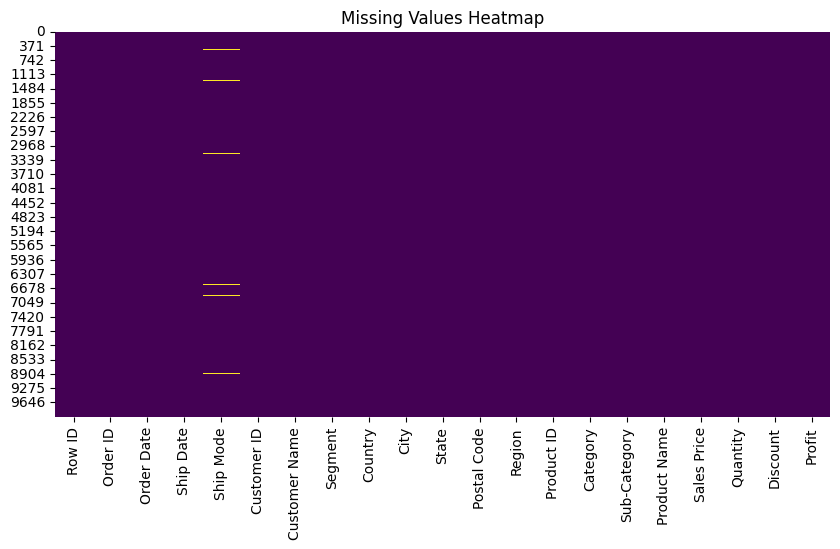

In [74]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.draw()

In [75]:

plt.clf()

<Figure size 640x480 with 0 Axes>

In [76]:
unique_values_unmelted = unique_values.to_frame().T
unique_values_unmelted.index = ['Unique Count'] 
unique_values_unmelted

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
Unique Count,9994,5009,1240,1334,4,793,793,3,1,531,...,631,4,1862,3,17,1850,5829,14,12,7287


##### 2. Check & handle duplicates

*  Identify & remove duplicate rows in dataset
*  Document number of rows & distinct order ids impacted by this operation

In [77]:
#Identify Duplicates
duplicated_rows = data[data.duplicated(keep=False)]
duplicated_row_counts = len(duplicated_rows)
duplicate_order_ids = duplicated_rows['Order ID'].nunique()
duplicated_rows_sorted = duplicated_rows.sort_values(by='Order ID')

# Number of rows in original data and duplicate row counts
rows_before = data.shape[0]
num_duplicate_rows = duplicated_rows.shape[0]



print(f"Duplicate order id count: {duplicate_order_ids}")
duplicated_rows_sorted['Order ID'].value_counts().reset_index()

#Cleaned data
data_cleaned = data.drop_duplicates()
rows_after = data_cleaned.shape[0]
order_ids_before = data['Order ID'].nunique()
order_ids_after = data_cleaned['Order ID'].nunique()

duplicate_summary = {
    "Duplicate Rows Removed": num_duplicate_rows,
    "Rows Before": rows_before,
    "Rows After": rows_after,
    "Distinct Order IDs Before": order_ids_before,
    "Distinct Order IDs After": order_ids_after,
    "Affected Order IDs": duplicate_order_ids
}

print(f"Duplicate Order ID summary:\n{duplicate_summary}")
duplicated_rows_sorted.head()



Duplicate order id count: 12
Duplicate Order ID summary:
{'Duplicate Rows Removed': 34, 'Rows Before': 10014, 'Rows After': 9997, 'Distinct Order IDs Before': 5009, 'Distinct Order IDs After': 5009, 'Affected Order IDs': 12}


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
10001,8853,CA-2014-119977,08/10/14,2014-10-13,Second Class,DN-13690,Duane Noonan,Consumer,United States,New York City,...,10011,East,OFF-PA-10003823,Office Supplies,Paper,Xerox 197,123.920,4.0,0.0,55.7640
8852,8853,CA-2014-119977,08/10/14,2014-10-13,Second Class,DN-13690,Duane Noonan,Consumer,United States,New York City,...,10011,East,OFF-PA-10003823,Office Supplies,Paper,Xerox 197,123.920,4.0,0.0,55.7640
10013,9616,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2033.584,2.0,0.2,762.5940
10011,9614,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.980,1.0,0.0,6.8940
10012,9615,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,TEC-AC-10002718,Technology,Accessories,Belkin Standard 104 key USB Keyboard,102.130,7.0,0.0,15.3195


In [78]:

duplicated_rows.shape


(34, 21)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\336847418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_duplicates.values, y=top_duplicates.index, palette="Blues_d")


Text(0, 0.5, 'Order ID')

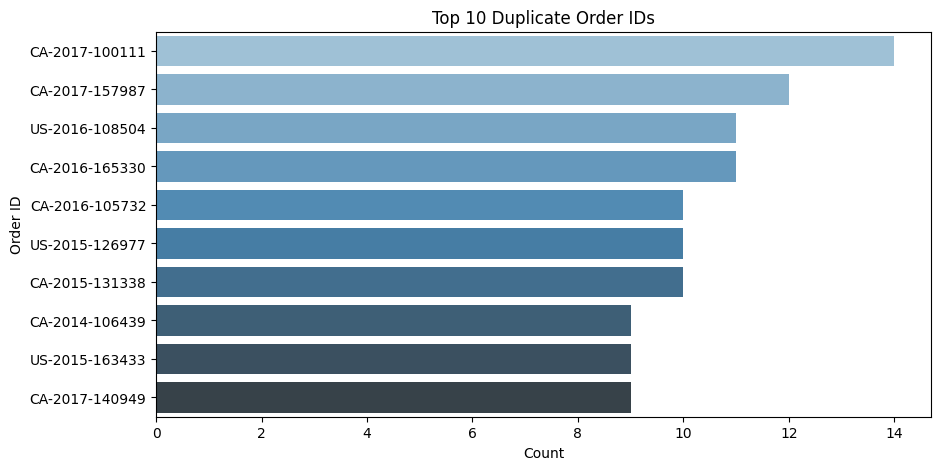

In [79]:
order_id_counts = data['Order ID'].value_counts()
top_duplicates = order_id_counts[order_id_counts > 1].head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_duplicates.values, y=top_duplicates.index, palette="Blues_d")
plt.title("Top 10 Duplicate Order IDs")
plt.xlabel("Count")
plt.ylabel("Order ID")

##### 3: Date Handling

In [80]:
# 3: Date Handling

# Copy the cleaned DataFrame from earlier steps
data_copy_step_3 = data_cleaned.copy()

# Store rows and Order IDs before processing for tracking
rows_before = data_copy_step_3.shape[0]
order_ids_before = data_copy_step_3['Order ID'].nunique()

# datetime conversion
data_copy_step_3['Order Date'] = pd.to_datetime(data_copy_step_3['Order Date'], errors='coerce', dayfirst=True)
data_copy_step_3['Ship Date'] = pd.to_datetime(data_copy_step_3['Ship Date'], errors='coerce', dayfirst=True)

# extract year from Order ID 
# (considering format "XX-YYYY-XXXXX")
# XX: Two Digit State Code
# YYYY: Year
# XXXXX: Order ID
# Example: CA-2014-119977
data_copy_step_3['Order ID Year'] = data_copy_step_3['Order ID'].str.extract(r'-(\d{4})-').astype(float)

# 3. Compare with actual Order Date year
data_copy_step_3['Order Date Year'] = data_copy_step_3['Order Date'].dt.year

# 4. Identify mismatches
year_mismatch_rows = data_copy_step_3[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year']]
affected_rows = year_mismatch_rows.shape[0]
affected_order_ids = year_mismatch_rows['Order ID'].nunique()

# 5. Correct the mismatches by aligning Order Date year with Order ID year
data_copy_step_3.loc[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year'], 'Order Date'] = \
    data_copy_step_3.loc[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year'], 'Order Date'].apply(
        lambda dt: dt.replace(year=int(data_copy_step_3.loc[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year'], 'Order ID Year'].mode()[0]))
        if pd.notnull(dt) else dt
    )

# Update the Order Date Year for consistency
data_copy_step_3['Order Date Year'] = data_copy_step_3['Order Date'].dt.year

#For plotting
plot_data_step3 = data_copy_step_3.copy()

# Clean up helper columns after use
data_copy_step_3.drop(columns=['Order ID Year'], inplace=True)

# Summarize impact
date_handling_summary = {
    "Rows Processed": rows_before,
    "Distinct Order IDs Before": order_ids_before,
    "Rows Affected by Year Fix": affected_rows,
    "Distinct Order IDs Affected": affected_order_ids
}

date_handling_summary

C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\3606948875.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_copy_step_3['Order Date'] = pd.to_datetime(data_copy_step_3['Order Date'], errors='coerce', dayfirst=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\3606948875.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_copy_step_3['Ship Date'] = pd.to_datetime(data_copy_step_3['Ship Date'], errors='coerce', dayfirst=True)


{'Rows Processed': 9997,
 'Distinct Order IDs Before': 5009,
 'Rows Affected by Year Fix': 40,
 'Distinct Order IDs Affected': 16}

C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\1959429403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year Match', data=year_df, palette='Set2')


Text(0.5, 1.0, 'Order ID Year vs Order Date Year Match')

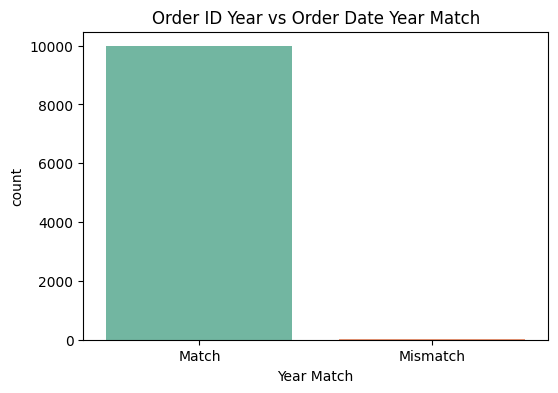

In [81]:
year_df = plot_data_step3.copy()
year_df['Year Match'] = np.where(year_df['Order ID Year'] == year_df['Order Date Year'], 'Match', 'Mismatch')
plt.figure(figsize=(6, 4))
sns.countplot(x='Year Match', data=year_df, palette='Set2')
plt.title("Order ID Year vs Order Date Year Match")

<Axes: title={'center': 'Order Volume Over Time'}, xlabel='Order Date', ylabel='Number of Orders'>

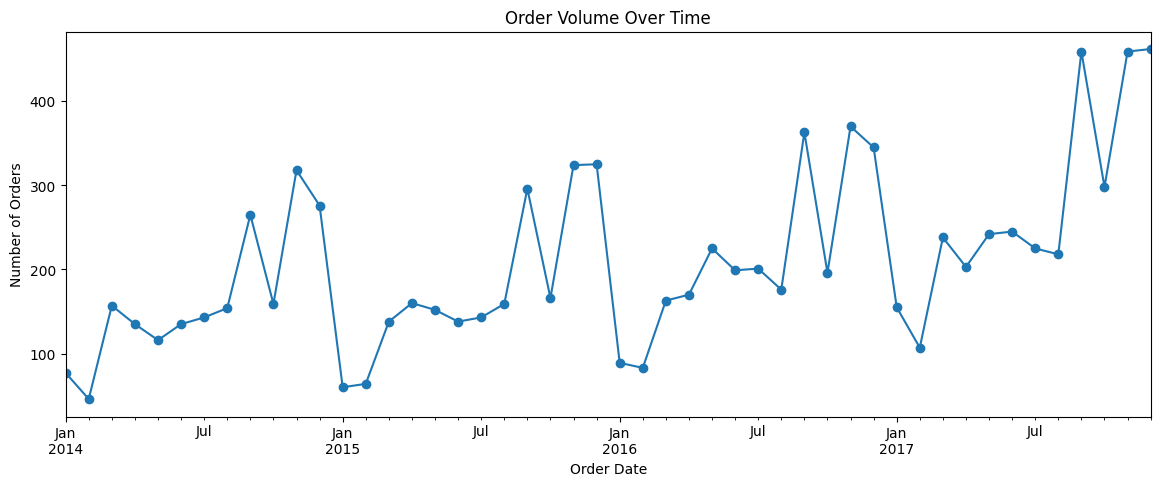

In [82]:
monthly_orders = plot_data_step3['Order Date'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(14, 5))
plt.title("Order Volume Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Order Month")
monthly_orders.plot(kind='line', marker='o')

In [83]:
# Step 4: 
data_step4 = data_copy_step_3.copy()
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Calculate Days to Ship
data_step4['Days to Ship'] = (data_step4['Ship Date'] - data_step4['Order Date']).dt.days

# Impute Ship Mode using Days to Ship
data_step4['Ship Mode'] = data_step4['Ship Mode'].fillna(
    data_step4['Days to Ship'].map({0: 'Same Day', 7: 'Standard Class'})
)

# Convert to numeric safely (non-numeric values → NaN)
data_step4['Quantity'] = pd.to_numeric(data_step4['Quantity'], errors='coerce')

#Count invalid entries
print("Before filling:")
print(data_step4['Quantity'].isna().sum(), "NaNs in Quantity")
print(data_step4['Quantity'].isin([float('inf'), float('-inf')]).sum(), "Inf values")

# Remove infinite values explicitly
data_step4 = data_step4[~data_step4['Quantity'].isin([float('inf'), float('-inf')])]

# Fill NaNs with median
median_val = data_step4['Quantity'].median()
data_step4['Quantity'] = data_step4['Quantity'].fillna(median_val)

# Check again before casting
print("After filling:")
print(data_step4['Quantity'].isna().sum(), "NaNs remaining")

# Now convert to integer safely
data_step4['Quantity'] = data_step4['Quantity'].astype(int)


Before filling:
18 NaNs in Quantity
0 Inf values
After filling:
0 NaNs remaining


<Axes: title={'center': 'Quantity Distribution (Box Plot)'}, xlabel='Quantity'>

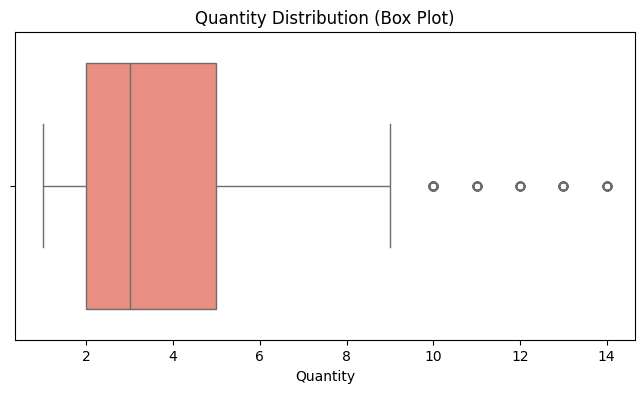

In [84]:
plt.figure(figsize=(8, 4))
plt.title("Quantity Distribution (Box Plot)")
sns.boxplot(x=data_step4['Quantity'].dropna(), color='salmon')

In [85]:
data_step4['Days to Ship'].max()
data_step4['Days to Ship'].min()

-365

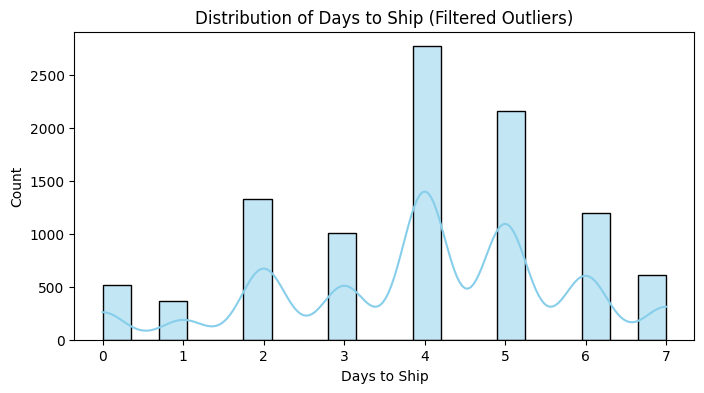

In [86]:
# Filter the data
filtered_data = remove_outliers(data_step4,'Days to Ship')
filtered_days_to_ship = filtered_data['Days to Ship']

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(filtered_days_to_ship, bins=20, kde=True, color='skyblue')
plt.title("Distribution of Days to Ship (Filtered Outliers)")
plt.xlabel("Days to Ship")
plt.ylabel("Count")
plt.show()


In [87]:
# Step 5: Mask customer name
data_masked_names = filtered_data.copy()
data_masked_names['Customer Name Masked'] = data_masked_names['Customer Name'].fillna("").apply(
    lambda name: '.'.join([n[0] for n in name.split() if n]) + '.' if name else ''
)
data_masked_names.drop(columns=['Customer Name'], inplace=True)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\1534995885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=initials_counts.values, y=initials_counts.index, palette="Purples_r")


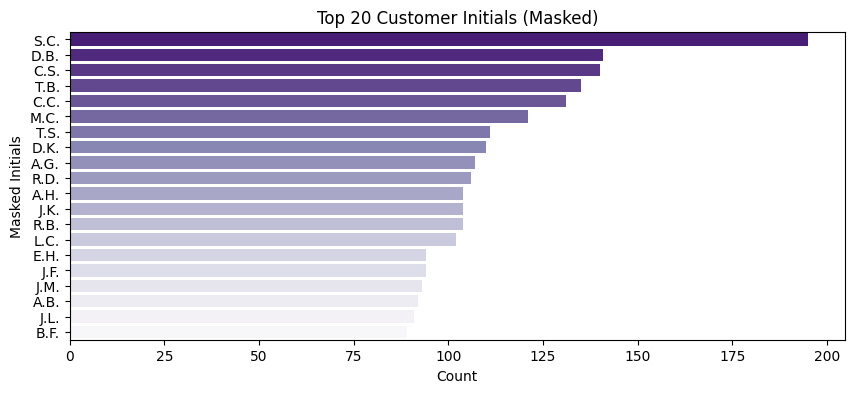

In [88]:
if 'Customer Name Masked' in data_masked_names.columns:
    initials_counts = data_masked_names['Customer Name Masked'].value_counts().head(20)
    plt.figure(figsize=(10, 4))
    plt.title("Top 20 Customer Initials (Masked)")
    plt.xlabel("Count")
    plt.ylabel("Masked Initials")
    sns.barplot(x=initials_counts.values, y=initials_counts.index, palette="Purples_r")


In [89]:
# Step 6: Data type conversion
date_converted_data = data_masked_names.copy()
date_converted_data['Postal Code'] = date_converted_data['Postal Code'].astype(str).str.zfill(5)
date_converted_data['Sales Price'] = pd.to_numeric(date_converted_data['Sales Price'], errors='coerce')
date_converted_data['Profit'] = pd.to_numeric(date_converted_data['Profit'], errors='coerce')

In [90]:
# Step 7: Replace state abbreviations
# used a standard csv instead of creating self gathered data for abbreviations
state_updated_data = date_converted_data.copy()
us_state_abbreviations = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
us_state_abbreviations.head()

# Create mapping dictionary
state_abbrev_map = dict(zip(us_state_abbreviations['Abbreviation'], us_state_abbreviations['State']))

# Replace abbreviations in your dataset
state_updated_data['State'] = state_updated_data['State'].replace(state_abbrev_map)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\4133612456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette="coolwarm")


Text(0.5, 0, 'Orders')

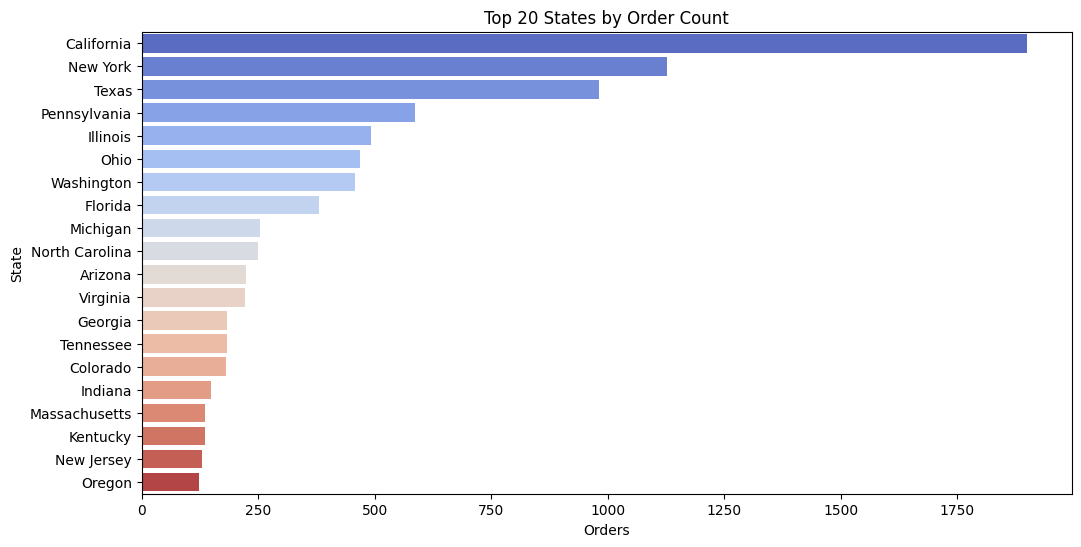

In [91]:
plt.figure(figsize=(12, 6))
state_counts = state_updated_data['State'].value_counts().head(20)
sns.barplot(y=state_counts.index, x=state_counts.values, palette="coolwarm")
plt.title("Top 20 States by Order Count")
plt.xlabel("Orders")

In [92]:
# Step 8: Feature engineering
features_data = state_updated_data.copy()
features_data['Original Price'] = features_data['Sales Price'] / (1 - features_data['Discount'].clip(upper=0.99))
features_data['Total Sales'] = features_data['Sales Price'] * features_data['Quantity']
features_data['Total Profit'] = features_data['Profit'] * features_data['Quantity']
features_data['Discount Price'] = features_data['Original Price'] - features_data['Sales Price']
features_data['Total Discount'] = features_data['Discount Price'] * features_data['Quantity']
features_data['Shipping Urgency'] = features_data['Days to Ship'].apply(
    lambda x: 'Immediate' if x == 0 else ('Urgent' if 1 <= x <= 3 else 'Standard')
)



C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\3515719972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=features_data, x='Shipping Urgency', order=['Immediate', 'Urgent', 'Standard'], palette='Blues')


Text(0.5, 1.0, 'Shipping Urgency Distribution')

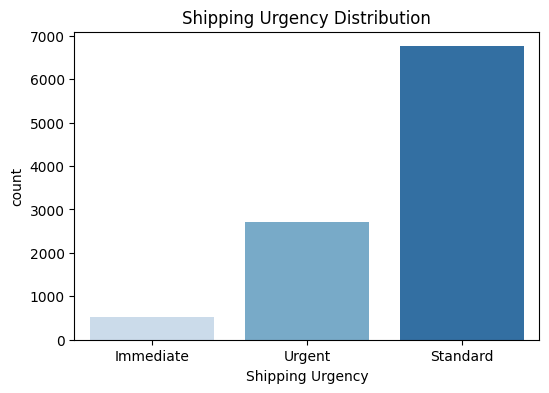

In [93]:
plt.figure(figsize=(6, 4))
sns.countplot(data=features_data, x='Shipping Urgency', order=['Immediate', 'Urgent', 'Standard'], palette='Blues')
plt.title("Shipping Urgency Distribution")


In [94]:
# Step 9: Outlier removal using 3*IQR
iqr_data = remove_outliers(features_data, 'Sales Price')
iqr_data = remove_outliers(features_data, 'Profit')


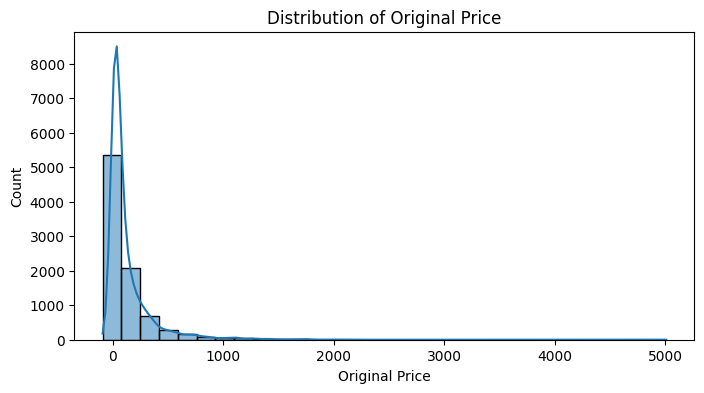

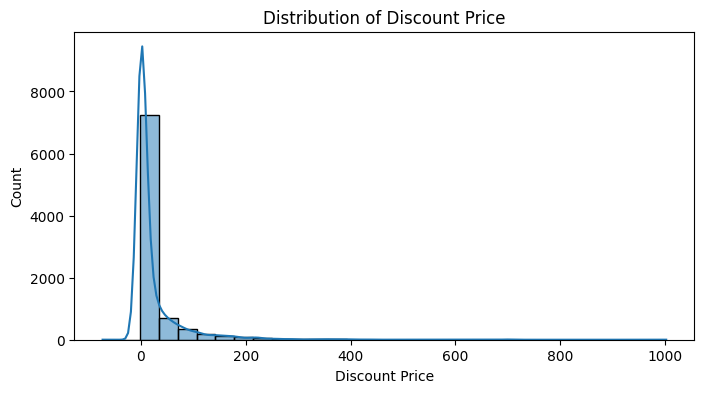

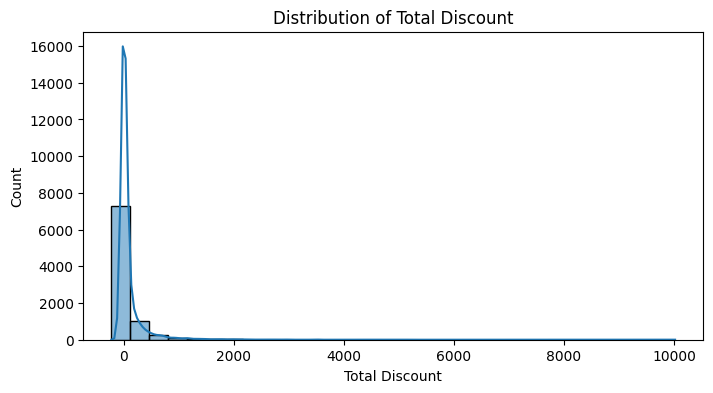

In [95]:
for col in ['Original Price', 'Discount Price', 'Total Discount']:
    plt.figure(figsize=(8, 4))
    sns.histplot(iqr_data[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")

In [96]:
# Step 10: Customer segmentation
customer_summary = iqr_data.groupby('Customer ID').agg({
    'Total Sales': 'sum',
    'Total Profit': 'sum'
}).reset_index()
customer_summary['Sales Quintile'] = pd.qcut(customer_summary['Total Sales'], 5, labels=[1, 2, 3, 4, 5])
customer_summary['Profit Quintile'] = pd.qcut(customer_summary['Total Profit'], 5, labels=[1, 2, 3, 4, 5])
segmented_data = iqr_data.merge(customer_summary[['Customer ID', 'Sales Quintile', 'Profit Quintile']], on='Customer ID', how='left')


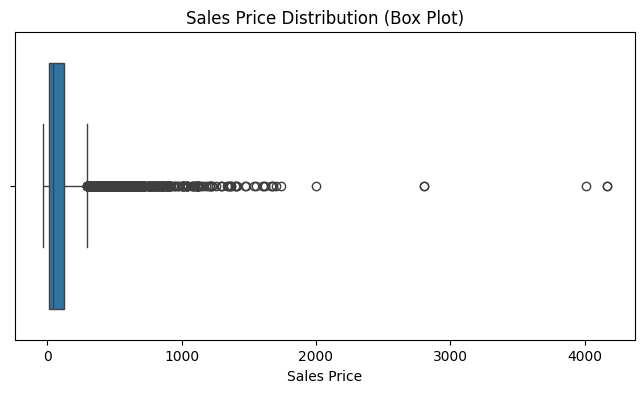

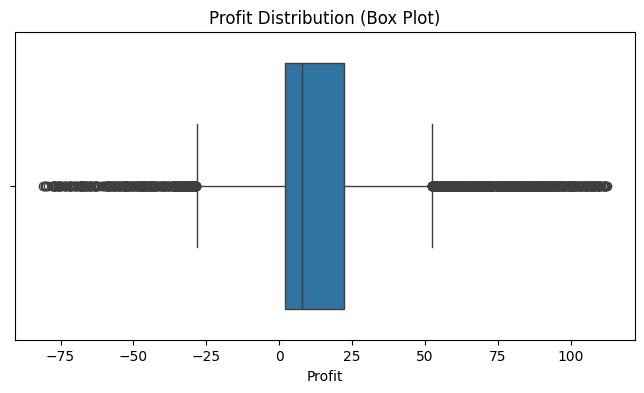

In [97]:
for col in ['Sales Price', 'Profit']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=segmented_data[col].dropna())
    plt.title(f"{col} Distribution (Box Plot)")

Text(0.5, 1.0, 'Customer Segmentation: Sales vs. Profit Quintile')

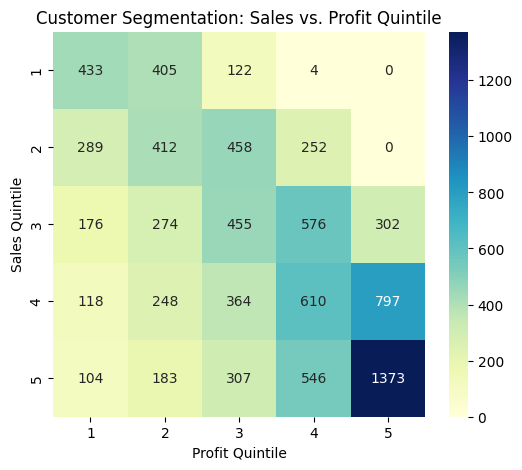

In [98]:
pivot_quintiles = pd.crosstab(segmented_data['Sales Quintile'], segmented_data['Profit Quintile'])
plt.figure(figsize=(6, 5))
sns.heatmap(pivot_quintiles, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Customer Segmentation: Sales vs. Profit Quintile")

C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\3373472451.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit.values, y=top_profit.index, palette="Greens")


<Axes: title={'center': 'Top 10 Most Profitable Products'}, ylabel='Product Name'>

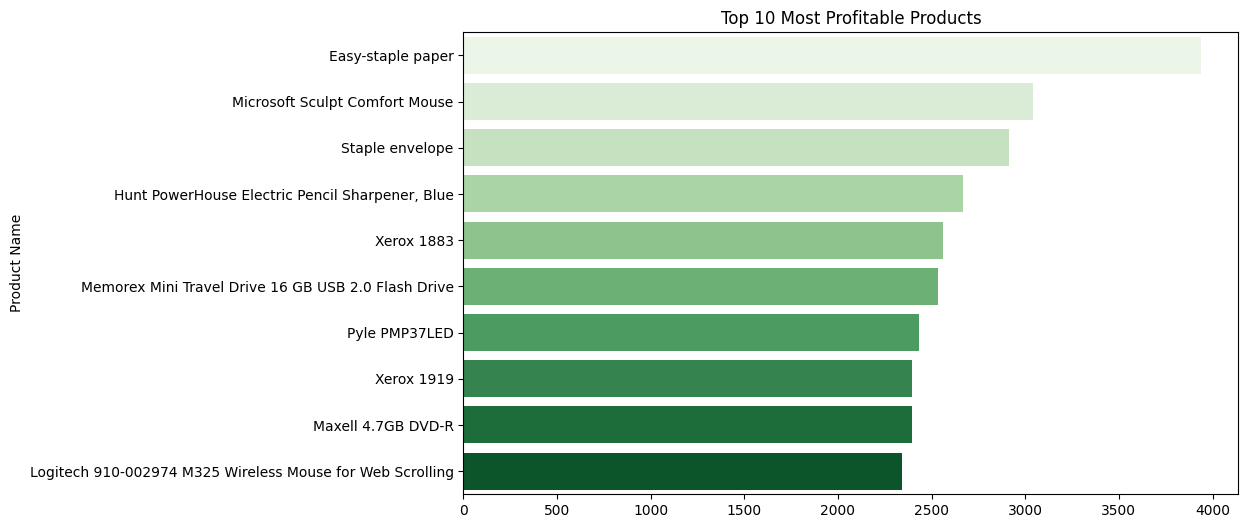

In [99]:
#Step 11: Top 10 Profitable Products
top_profit = segmented_data.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Profitable Products")
sns.barplot(x=top_profit.values, y=top_profit.index, palette="Greens")


C:\Users\Harsh\AppData\Local\Temp\ipykernel_40740\1083800267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_profit.values, y=bottom_profit.index, palette="Reds")


<Axes: title={'center': 'Top 10 Most Loss-Making Products'}, ylabel='Product Name'>

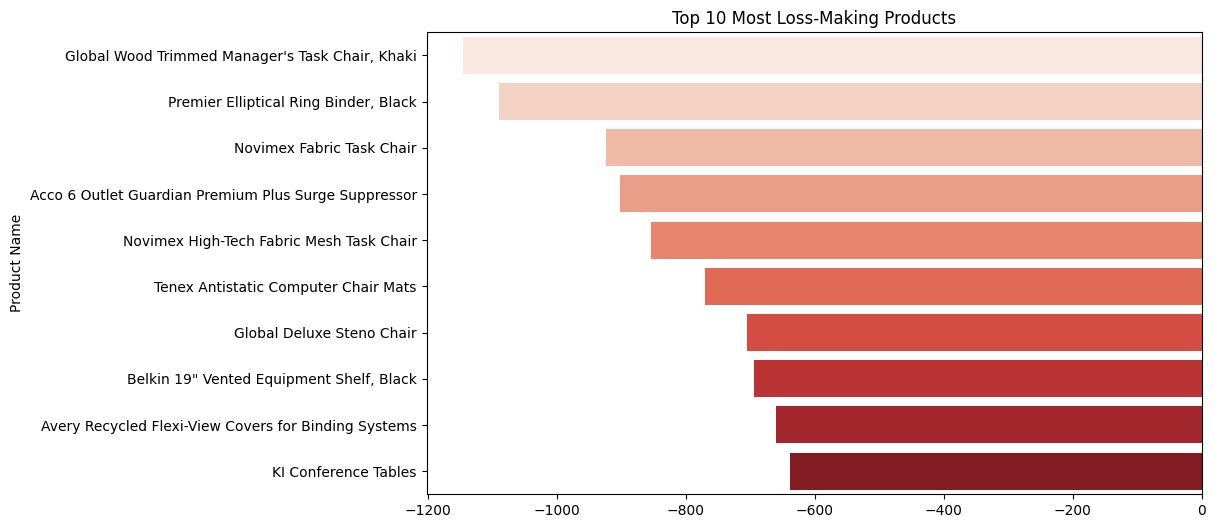

In [100]:
bottom_profit = segmented_data.groupby('Product Name')['Total Profit'].sum().sort_values().head(10)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Loss-Making Products")
sns.barplot(x=bottom_profit.values, y=bottom_profit.index, palette="Reds")

Text(0.5, 1.0, 'Total Sales vs. Total Profit')

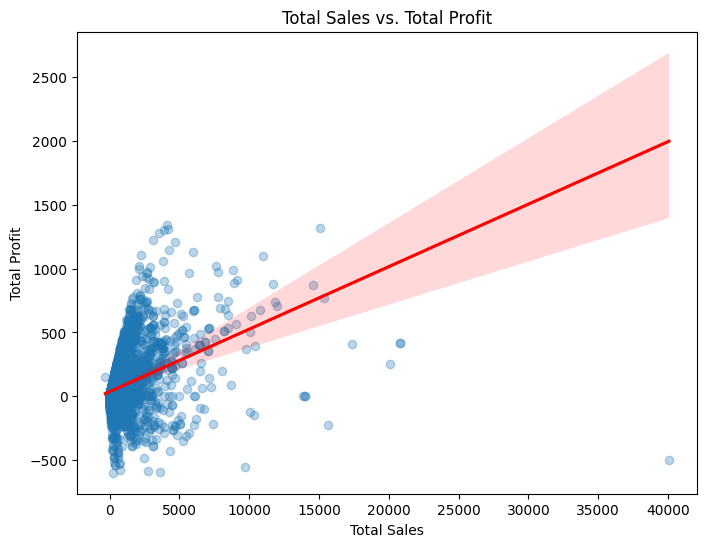

In [101]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Total Sales', y='Total Profit', data=segmented_data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Total Sales vs. Total Profit")

Text(0.5, 1.0, 'Days to Ship vs Profit Distribution')

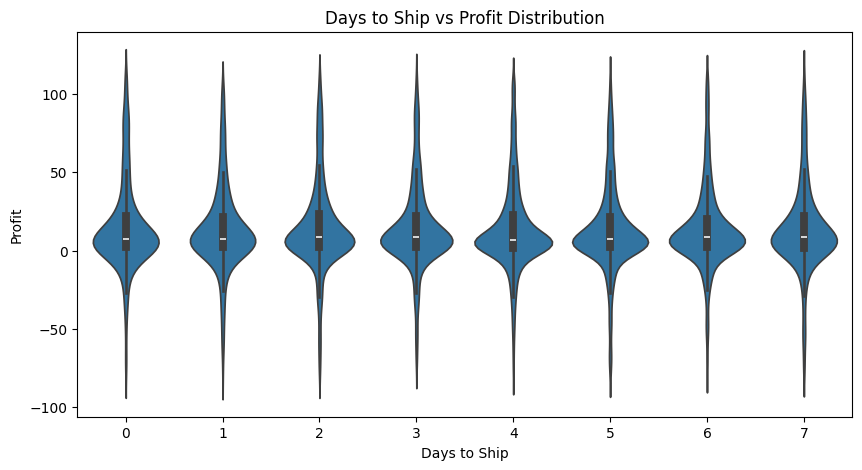

In [102]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=segmented_data, x='Days to Ship', y='Profit')
plt.title("Days to Ship vs Profit Distribution")

In [103]:
# Save final dataset
final_path = "./SuperStore_Cleaned_Final.csv"
segmented_data.to_csv(final_path, index=False)

final_path

'./SuperStore_Cleaned_Final.csv'